In [95]:
import pandas as pd
import os
import glob
import numpy as np
os.path.abspath('')
REPO_PATH = "c:/Users/Pulkit/Documents/Projects/Gradebook/"
DATA_PATH = REPO_PATH + "data/"

##### Loading all Data

In [96]:
roster = pd.read_csv(
    DATA_PATH + "roster.csv",
    index_col="NetID",
    converters={
        "NetID": str.lower,
        "Email Address": str.lower
    },
    usecols=["NetID", "Email Address", "Section"]
)
print(roster)

                      Email Address  Section
NetID                                       
wxb12345  woody.barrera_jr@univ.edu        1
mxl12345   malaika.lambert@univ.edu        2
txj12345       traci.joyce@univ.edu        1
jgf12345   john.g.2.flower@univ.edu        3
smj00936     stacy.johnson@univ.edu        2
...                             ...      ...
pmj37756      paul.johnson@univ.edu        3
dsl24347      danielle.lee@univ.edu        3
nxe44872    nicole.edwards@univ.edu        3
bxr62103      bailey.reyes@univ.edu        2
jxw53347       joyce.walls@univ.edu        1

[150 rows x 2 columns]


In [97]:
hwExamGrades = pd.read_csv(
    DATA_PATH + "hw_exam_grades.csv",
    index_col="SID",
    converters={
        "SID": str.lower
    },
    usecols=lambda x: "Submission" not in x
)
print(hwExamGrades)

         First Name   Last Name  Homework 1  Homework 1 - Max Points  \
SID                                                                    
axl60952      Aaron      Lester        68.0                       80   
amc28428       Adam      Cooper        80.0                       80   
axc64717       Alec       Curry        69.0                       80   
akr14831  Alexander   Rodriguez        50.0                       80   
axd11293      Amber     Daniels        54.0                       80   
...             ...         ...         ...                      ...   
txw75701     Travis  Washington        64.0                       80   
tbr17292       Troy     Raymond        50.0                       80   
vkb66346   Victoria        Boyd        58.0                       80   
wad63934    William      Daniel        48.0                       80   
wxb12345      Woody     Barrera        55.0                       80   

          Homework 2  Homework 2 - Max Points  Homework 3  \
SI

In [98]:
quizGradesFiles = ["quiz_1_grades.csv", "quiz_2_grades.csv", "quiz_3_grades.csv", "quiz_4_grades.csv", "quiz_5_grades.csv"]
quizGrades = pd.DataFrame()
print(quizGrades)
print("---------------------------------------------")
for i in quizGradesFiles:
    quizName = " ".join(i.split("_")[:2])
    quiz = pd.read_csv(
        DATA_PATH + i,
        index_col="Email",
        converters={
            "Email": str.lower
        },
        usecols=["Email", "Grade"]
    ).rename(columns={"Grade": quizName})
    quizGrades = pd.concat([quizGrades, quiz], axis=1)

print(quizGrades)
print("---------------------------------------------")

Empty DataFrame
Columns: []
Index: []
---------------------------------------------
                          quiz 1  quiz 2  quiz 3  quiz 4  quiz 5
Email                                                           
richard.bennett@univ.edu      10       6       9       8      10
timothy.parker@univ.edu        9      14      13      14      10
carol.reyes@univ.edu           5      15       8      14       6
brooke.powers@univ.edu         6      10      17      10       8
michael.taylor@univ.edu        5      15      13      12       5
...                          ...     ...     ...     ...     ...
jeffrey.perez@univ.edu         4       7      12      12       9
angela.dunlap@univ.edu         6      11      11      11       6
richard.elliott@univ.edu       6      13      17      11      12
donna.nguyen@univ.edu          7      12      14       9       4
timothy.ramirez@univ.edu       4       8      13       6       4

[150 rows x 5 columns]
---------------------------------------------


##### Merging all data together

In [99]:
completeData = pd.merge(
    roster, hwExamGrades, left_index=True, right_index=True
)
completeData = pd.merge(
    completeData, quizGrades, left_on="Email Address", right_index=True
)
print(completeData)

                      Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         NaN   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max 

In [100]:
# Preprocessing Step: Making all NaN values to 0
completeData.fillna(0, inplace=True)
print(completeData)

                      Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max 

In [101]:
totalNumberOfExams = 3
for i in range(1, totalNumberOfExams + 1):
    completeData["Exam {} Score".format(i)] = (
        completeData["Exam {}".format(i)] / completeData["Exam {} - Max Points".format(i)]
    )
print(completeData)

                      Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max 

##### Calculating for Homeworks

In [102]:
homeworkScore = completeData.filter(regex=r"^Homework \d\d?$", axis = 1)
homeworkMaxScore = completeData.filter(regex=r"^Homework \d\d? -", axis = 1)
sumHomeworkScores = homeworkScore.sum(axis = 1)
sumHomeworkMaxScores = homeworkMaxScore.sum(axis = 1)

homeworkMaxScore = homeworkMaxScore.set_axis(homeworkScore.columns, axis = 1)
averageHomeworkScores = (homeworkScore / homeworkMaxScore).sum(axis=1)

In [103]:
completeData["Total Homework"] = sumHomeworkScores/sumHomeworkMaxScores
completeData["Average Homework"] = averageHomeworkScores / homeworkScore.shape[1]
completeData["Homework Score"] = completeData[["Total Homework", "Average Homework"]].max(axis=1)
print(completeData)

                      Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max 

##### Calculating for Quizes

In [104]:
quizScore = completeData.filter(regex=r"^quiz \d$", axis = 1)
totalQuizScore = quizScore.sum(axis=1)

# the quizMaxPoints is provided in the reference website.
quizMaxPoints = pd.Series(
    {"quiz 1": 11, "quiz 2": 15, "quiz 3": 17, "quiz 4": 14, "quiz 5": 12}
)

completeData["Total Quiz"] = totalQuizScore / quizMaxPoints.sum()
completeData ["Average Quiz"] = (quizScore/quizMaxPoints).sum(axis=1) / quizScore.shape[1]
completeData["Quiz Score"] = completeData[["Total Quiz", "Average Quiz"]].max(axis=1)
print(completeData)

                      Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max 

In [105]:
quizScore = completeData.filter(regex=r"^quiz \d$", axis = 1)
totalQuizScore = quizScore.sum(axis=1)

# the quizMaxPoints is provided in the reference website.
quizMaxPoints = pd.Series(
    {"quiz 1": 11, "quiz 2": 15, "quiz 3": 17, "quiz 4": 14, "quiz 5": 12}
)

completeData["Total Quiz"] = totalQuizScore / quizMaxPoints.sum()
completeData ["Average Quiz"] = (quizScore/quizMaxPoints).sum(axis=1) / quizScore.shape[1]
completeData["Quiz Score"] = completeData[["Total Quiz", "Average Quiz"]].max(axis=1)
print(completeData)

                      Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max 

##### Finding Final Score

In [107]:

# weightings was given in the question / reference website
weightings = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,
    }
)
completeData["Final Score"] = (completeData[weightings.index]*weightings).sum(axis=1)
completeData["Ceiling Score"] = np.ceil(completeData["Final Score"] * 100)
print(completeData)

                      Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max 

##### Mapping the letter Grade

In [114]:
grades = {
    90: 'A',
    80: 'B',
    70: 'C',
    60: 'D',
    0: 'F'
}
def gradeMapping(value):
    for range, grade in grades.items():
        if value >= range:
            return grade


letterGrades = completeData["Ceiling Score"].map(gradeMapping)
completeData["Final Grade"] = pd.Categorical(letterGrades, categories=grades.values(), ordered=True)
print(completeData)

                      Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max 

##### Saving the data in CSV files

In [119]:

for section, table in completeData.groupby(by="Section"):
    file = REPO_PATH + "Section {} Grades.csv".format(section)
    students = table.shape[0]
    print("The section {}, there are {} student(s) and their data is saved to file '{}'".format(section, students, file))
    table.sort_values(by=["Last Name","First Name"]).to_csv(file)

The section 1, there are 56 student(s) and their data is saved to file 'c:/Users/Pulkit/Documents/Projects/Gradebook/Section 1 Grades.csv'
The section 2, there are 51 student(s) and their data is saved to file 'c:/Users/Pulkit/Documents/Projects/Gradebook/Section 2 Grades.csv'
The section 3, there are 43 student(s) and their data is saved to file 'c:/Users/Pulkit/Documents/Projects/Gradebook/Section 3 Grades.csv'


##### Some Plots of the data

In [137]:
import matplotlib.pyplot as plt
import scipy

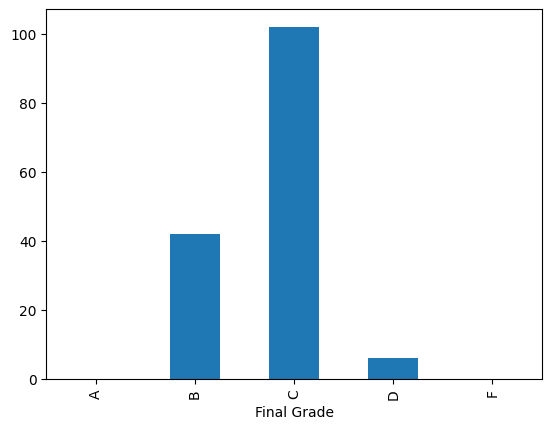

In [138]:
gradeDistribution = completeData["Final Grade"].value_counts().sort_index()
gradeDistribution.plot.bar()
plt.show()

<Axes: ylabel='Frequency'>

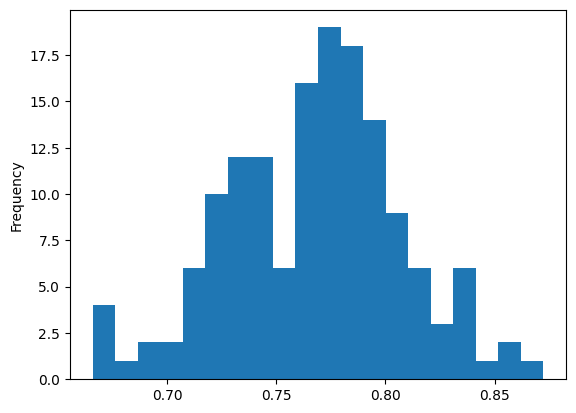

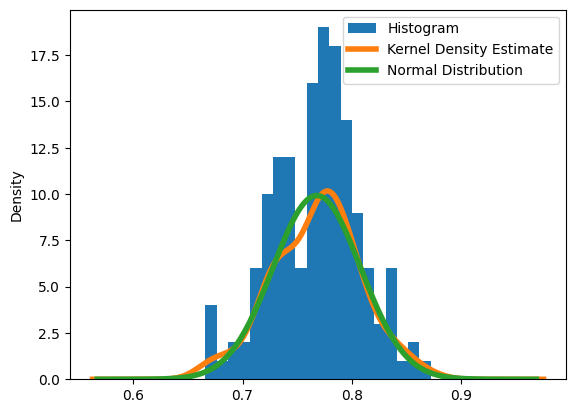

In [141]:
completeData["Final Score"].plot.hist(bins=20, label="Histogram")
completeData["Final Score"].plot.density(linewidth=4, label="Kernel Density Estimate")
mean = completeData["Final Score"].mean()
stdDev = completeData["Final Score"].std()
x = np.linspace(mean - 5*stdDev, mean + 5*stdDev, 200)
normalDistribution = scipy.stats.norm.pdf(x, loc=mean, scale=stdDev)
plt.plot(x, normalDistribution, label="Normal Distribution", linewidth=4)
plt.legend()
plt.show()